# Run With pip jupter notebook.

# Credit Card Fraud Detection

### Checking Whether the customer done any fraud transaction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/Credit_Card_Applications.csv")
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

y contains the persons credit card status whether it's approved or not.

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler(feature_range=(0,1))

In [6]:
X = sc.fit_transform(X)

## Training SOM

#### Inorder to use self organising maps we need to use SOM library by importing, else can type the som code in panel and use it.

In [7]:
from minisom import MiniSom

Features in MiniSom
    * x,y be the dimensions of grid( Need to choose the grid size )
    * input_len being the number of columns in x 
    * sigma being the default value.
    * learning_rate being the weights get updated after iteration.
        # higher the learning rate, faster the convergence
        # lower the learning rate, slower the conversion of maps.
    * decay_function is used to improve convergence.

In [8]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [9]:
som.random_weights_init(X)

In [10]:
som.train_random(data = X, num_iteration = 100)

## Visualizing Graph (SOM)

In [11]:
from pylab import bone, pcolor, colorbar, plot, show

In [12]:
bone()

<Figure size 432x288 with 0 Axes>

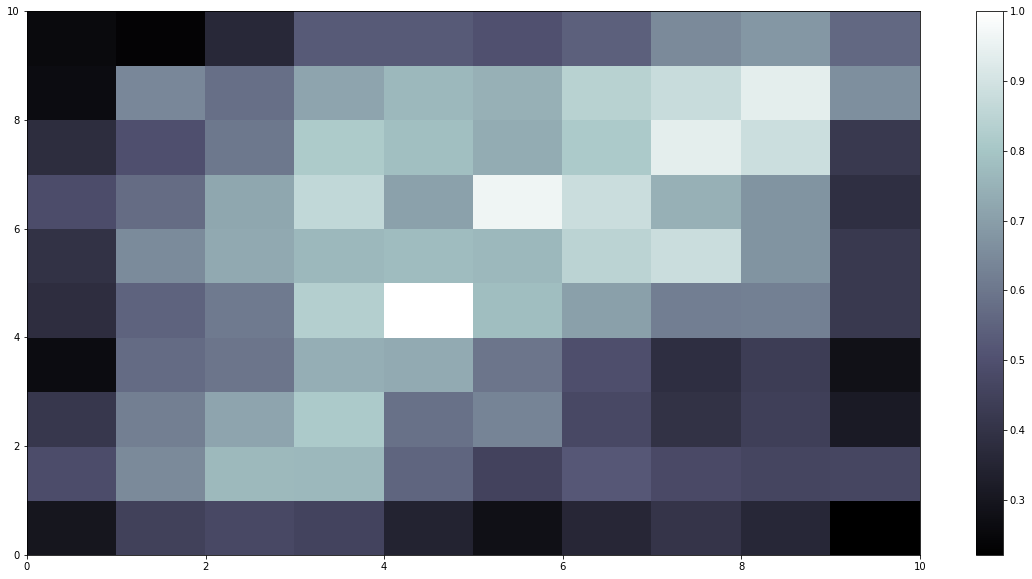

In [13]:
plt.figure(figsize = (20,10))
pcolor(som.distance_map().T) # T will oonsider the transpose of a matrix #
colorbar()

In [14]:
markers = ['o', 's']
colors = ['r', 'g'] # r = red, g = gree, o = orange, s = 'silver' # 

<Figure size 432x288 with 0 Axes>

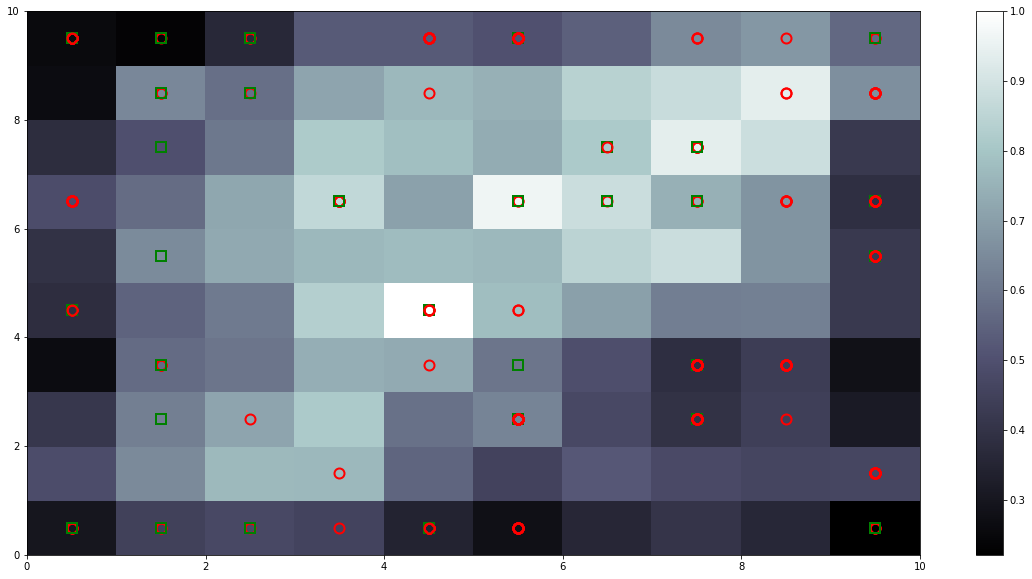

In [15]:
bone()
plt.figure(figsize = (20,10))
pcolor(som.distance_map().T) # T will oonsider the transpose of a matrix #
colorbar()
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)  # 0.5 is added to provide the circle on the centre of square #

show()

### Catching Fraud Transactions

In [16]:
mappings = som.win_map(X)

Everytime we restart kernel we will get new mappings values, we need to change them as per to the output.

In [17]:
frauds = np.concatenate((mappings[(4,4)], mappings[(5,6)]), axis = 0)

In [18]:
frauds = sc.inverse_transform(frauds)

In [19]:
frauds

array([[1.5608595e+07, 0.0000000e+00, 3.0420000e+01, 1.3750000e+00,
        2.0000000e+00, 9.0000000e+00, 8.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.4000000e+01],
       [1.5761158e+07, 0.0000000e+00, 1.6500000e+01, 1.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 9.9000000e+01],
       [1.5666166e+07, 0.0000000e+00, 2.0080000e+01, 1.2500000e-01,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.4000000e+02, 7.6900000e+02],
       [1.5605872e+07, 0.0000000e+00, 1.9580000e+01, 6.6500000e-01,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [20]:
from IPython.display import HTML, display
import tabulate

In [21]:
display(HTML(tabulate.tabulate(frauds, tablefmt='html')))

1.56086e+07,0,30.42,1.375,2,9,8,0.04,0,1,3,0,2,0,34
1.57612e+07,0,16.5,1.25,2,11,4,0.25,0,1,1,0,2,108,99
1.56662e+07,0,20.08,0.125,2,11,4,1,0,1,1,0,2,240,769
1.56059e+07,0,19.58,0.665,1,8,4,1,0,1,1,0,2,2000,3
1.56651e+07,0,18.25,10,2,9,4,1,0,1,1,0,2,120,2
1.57903e+07,0,18.92,9,2,6,4,0.75,1,1,2,0,2,88,592
1.57686e+07,0,22.42,5.665,2,11,4,2.585,1,1,7,0,2,129,3258
1.57486e+07,0,30.67,12,2,8,4,2,1,1,1,0,2,220,20
1.57575e+07,0,52.83,15,2,8,4,5.5,1,1,14,0,2,0,2201
1.56826e+07,0,32.17,1.46,2,9,4,1.085,1,1,16,0,2,120,2080
1.58014e+07,0,35.75,0.915,2,6,4,0.75,1,1,4,0,2,0,1584
